In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Centre_game = pd.read_csv("Game 6-7.xlsx - Centre.csv")

In [6]:
Centre_game

,Session Title,Player Name,Minutes Played,Split Name,Tags,Player Name.1,Distance (miles),Player Name.2,Sprint Distance (yards),Player Name.3,...,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s,Unnamed: 99,Unnamed: 100,Player Name.5
0,Centre,O,45.0,game,game,O,3.1050,O,398.4863,O,...,26,8,0,129,67,32,13,45.0,45.0,O
1,Centre,M,34.0,game,game,M,2.1197,M,248.5076,M,...,11,1,0,80,51,20,6,26.0,26.0,M
2,Centre,V,45.0,game,game,V,2.9812,V,109.1248,V,...,19,6,0,153,58,18,8,26.0,26.0,V
3,Centre,K,90.0,game,game,K,5.7231,K,287.2651,K,...,31,5,0,242,106,43,17,60.0,60.0,K
4,Centre,A,0.0,game,game,A,0.1119,A,0.0000,A,...,0,0,0,0,1,0,0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Centre,X,NaN,2nd.half,game,X,0.0598,X,0.0000,X,...,0,0,0,0,1,0,0,NaN,NaN,X
59,Centre,U,NaN,2nd.half,game,U,1.7307,U,73.1680,U,...,22,5,0,46,41,24,17,NaN,NaN,U
60,Centre,P,NaN,2nd.half,game,P,2.4836,P,93.8230,P,...,17,8,0,85,33,27,9,NaN,NaN,P
61,Centre,H,NaN,2nd.half,game,H,0.1335,H,0.0000,H,...,0,0,0,1,2,0,0,NaN,NaN,H


In [7]:
Centre_full = Centre_game[Centre_game['Split Name']== 'game']
Centre_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Player Name.1,Distance (miles),Player Name.2,Sprint Distance (yards),Player Name.3,...,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s,Unnamed: 99,Unnamed: 100,Player Name.5
0,Centre,O,45.0,game,game,O,3.1050,O,398.4863,O,...,26,8,0,129,67,32,13,45.0,45.0,O
1,Centre,M,34.0,game,game,M,2.1197,M,248.5076,M,...,11,1,0,80,51,20,6,26.0,26.0,M
2,Centre,V,45.0,game,game,V,2.9812,V,109.1248,V,...,19,6,0,153,58,18,8,26.0,26.0,V
3,Centre,K,90.0,game,game,K,5.7231,K,287.2651,K,...,31,5,0,242,106,43,17,60.0,60.0,K
4,Centre,A,0.0,game,game,A,0.1119,A,0.0000,A,...,0,0,0,0,1,0,0,0.0,0.0,A
5,Centre,N,16.0,game,game,N,1.2561,N,87.5872,N,...,14,4,0,50,28,17,4,21.0,21.0,N
6,Centre,Q,56.0,game,game,Q,3.9512,Q,55.0556,Q,...,19,1,0,156,83,34,15,49.0,49.0,Q
7,Centre,B,26.0,game,game,B,2.2492,B,291.5969,B,...,10,1,0,101,37,14,4,18.0,18.0,B
8,Centre,I,29.0,game,game,I,2.1043,I,156.4584,I,...,11,4,0,74,42,19,8,27.0,27.0,I
9,Centre,E,39.0,game,game,E,3.0023,E,81.0474,E,...,21,5,0,163,73,21,10,31.0,31.0,E


In [8]:
Centre_volume_intensity = Centre_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [9]:
Centre_cluster = Centre_volume_intensity.loc[:, Centre_volume_intensity.columns != 'Player Name']

In [10]:
Centre_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Centre_cluster)
    Centre_distortions.append(kmeanModel.inertia_)

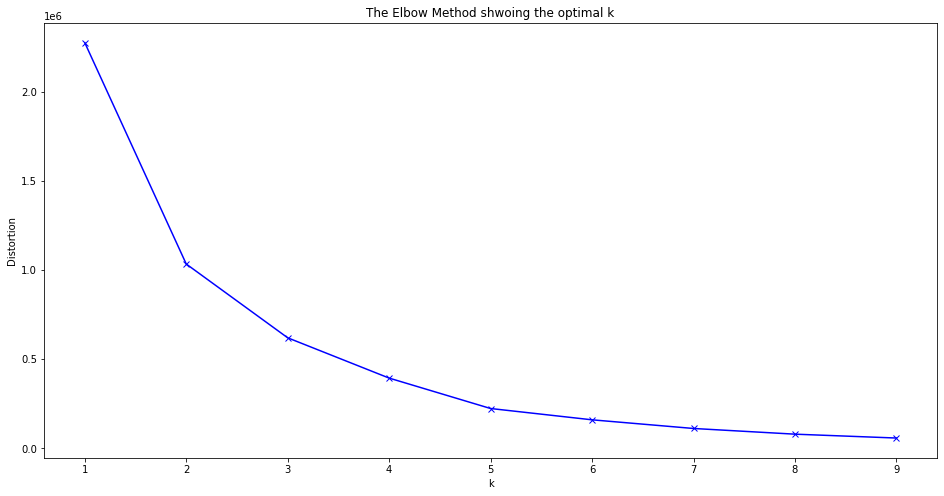

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, Centre_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [12]:
x_Centre = Centre_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Centre)
X_norm = pd.DataFrame(x_scaled)

In [13]:
pca_Centre = PCA(n_components = 2) # 2D PCA for the plot
reduced_Centre = pd.DataFrame(pca_Centre.fit_transform(X_norm))

In [14]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Centre)
# get the cluster labels
labels = kmeans.predict(reduced_Centre)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Centre_names = Centre_full['Player Name']

In [15]:
reduced_Centre['cluster'] = clusters
reduced_Centre['names'] = Centre_names
reduced_Centre.columns = ['x', 'y', 'cluster', 'names']
reduced_Centre.head()

,x,y,cluster,names
0,-0.198545,-0.595514,0,O
1,0.344099,-0.226144,0,M
2,0.095533,0.034522,0,V
3,-1.262063,-0.120254,2,K
4,1.591110,0.194157,1,A


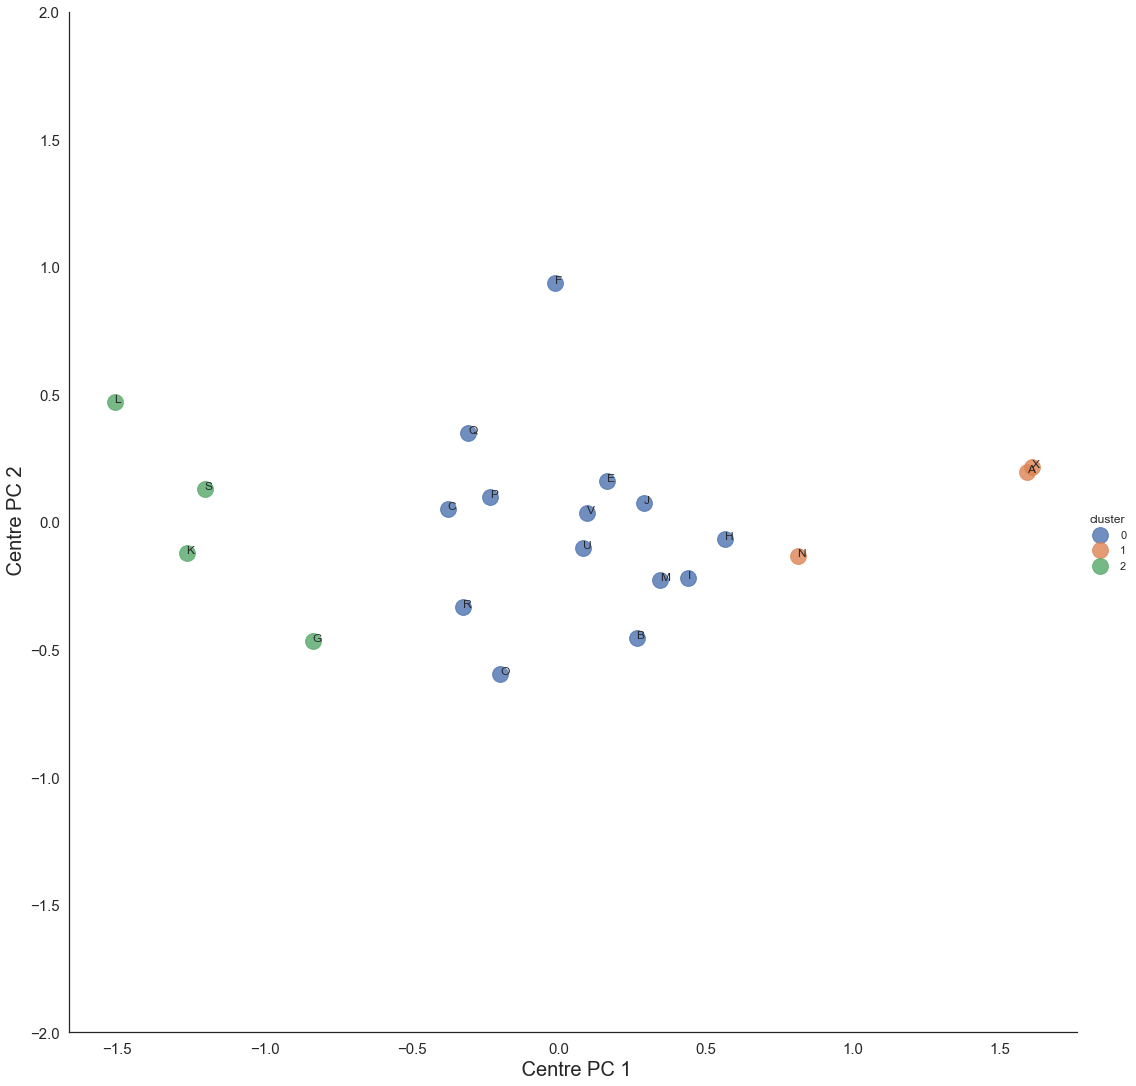

In [16]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Centre, legend= True,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced_Centre.x, reduced_Centre.y, reduced_Centre.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel(" Centre PC 1", fontsize = 20)
plt.ylabel(" Centre PC 2", fontsize = 20)
plt.show()

In [17]:
Centre_group_0 = reduced_Centre[(reduced_Centre['cluster'] == 0)]
Centre_group_0
# Positions: O(F) M(D) V(MF) Q(MF) B(F) I(F) E(MF) J(F) C(MF) R(D) U(MF) P(F) H(F) F(GK)

,x,y,cluster,names
0,-0.198545,-0.595514,0,O
1,0.344099,-0.226144,0,M
2,0.095533,0.034522,0,V
6,-0.306811,0.350632,0,Q
7,0.265580,-0.455549,0,B
8,0.438688,-0.219585,0,I
9,0.162901,0.161310,0,E
11,0.289266,0.075680,0,J
13,-0.375698,0.049177,0,C
14,-0.324424,-0.334188,0,R


In [18]:
Centre_group_1 = reduced_Centre[(reduced_Centre['cluster'] == 1)]
Centre_group_1
# Positions: A(D) N(F) X(GK)

,x,y,cluster,names
4,1.591110,0.194157,1,A
5,0.814473,-0.133465,1,N
16,1.607182,0.216091,1,X


In [19]:
Centre_group_2 = reduced_Centre[(reduced_Centre['cluster'] == 2)]
Centre_group_2
# Postions: K(D) S(MF) L(D) G(F)

,x,y,cluster,names
3,-1.262063,-0.120254,2,K
10,-1.201195,0.130097,2,S
12,-1.507597,0.471024,2,L
15,-0.835276,-0.466943,2,G
